# Unsupervised Algorithms in Machine Learning

# <font color='blue'>Project Summary</font>

### Problem description

Hi! This is my Final Project for DTSA 5510 Unsupervised Algorithms in Machine Learning. In this problem, I will be using a dataset I found from www.kaggle.com.

<br>

Source: https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels/data

<br>

Obesity is a global health problem that can cause sevaral physical and mental problems. As the prevalence of obesity increasing steadily, new research is needed to examine what factors influence obesity and how to predict obesity with these factors.

<br>

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

<br>

The objective of this project is to train an unsupervised learning model with the data and check its accuracy.

<br>


The factors included in the dataset are listed below:

Gender: Feature, Categorical, "Gender"

Age : Feature, Continuous, "Age"

Height: Feature, Continuous

Weight: Feature Continuous

family_history_with_overweight: Feature, Binary, " Has a family member suffered or suffers from overweight? "

FAVC : Feature, Binary, " Do you eat high caloric food frequently? "

FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "

NCP : Feature, Continuous, " How many main meals do you have daily? "

CAEC : Feature, Categorical, " Do you eat any food between meals? "

SMOKE : Feature, Binary, " Do you smoke? "

CH2O: Feature, Continuous, " How much water do you drink daily? "

SCC: Feature, Binary, " Do you monitor the calories you eat daily? "

FAF: Feature, Continuous, " How often do you have physical activity? "

TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "

CALC : Feature, Categorical, " How often do you drink alcohol? "

MTRANS : Feature, Categorical, " Which transportation do you usually use? "

NObeyesdad : Target, Categorical, "Obesity level"

# <font color='blue'>Exploratory Data Analysis</font>

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

In [110]:
# load data
df = pd.read_csv('Obesity Data.csv')

In [111]:
df.shape

(2111, 17)

In [112]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [114]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [115]:
# check missing value
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

### Data Visualization - Categorical

In [116]:
factor_categorical = df.select_dtypes(include = 'object')
colname_categorical = list(factor_categorical.columns)
colname_categorical

['Gender',
 'CALC',
 'FAVC',
 'SCC',
 'SMOKE',
 'family_history_with_overweight',
 'CAEC',
 'MTRANS',
 'NObeyesdad']

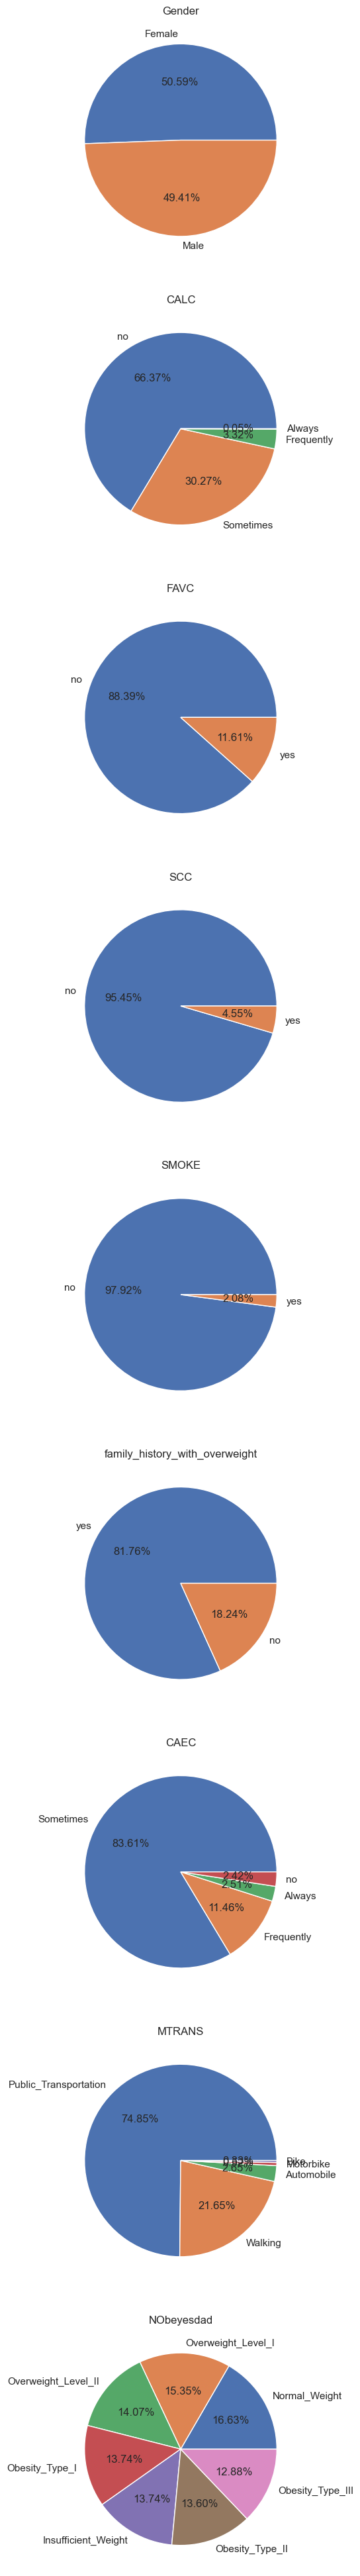

In [122]:
plt.rcParams['figure.figsize'] = (100, 50)
sns.set(font_scale = 1)
total_plot = len(colname_categorical)

for index, feature in enumerate(colname_categorical, 1):
    plt.subplot(total_plot, 1, index)
    labels = factor_categorical[feature].unique().tolist()
    plt.pie(factor_categorical[feature].value_counts(), labels = labels, autopct = '%.2f%%')
    plt.title(feature)
    plt.axis('off')

### Data Visualization - Continuous 

In [123]:
factor_continuous = df.select_dtypes(include = 'float64')
colname_continuous = list(factor_continuous.columns)
colname_continuous
colname_continuous

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

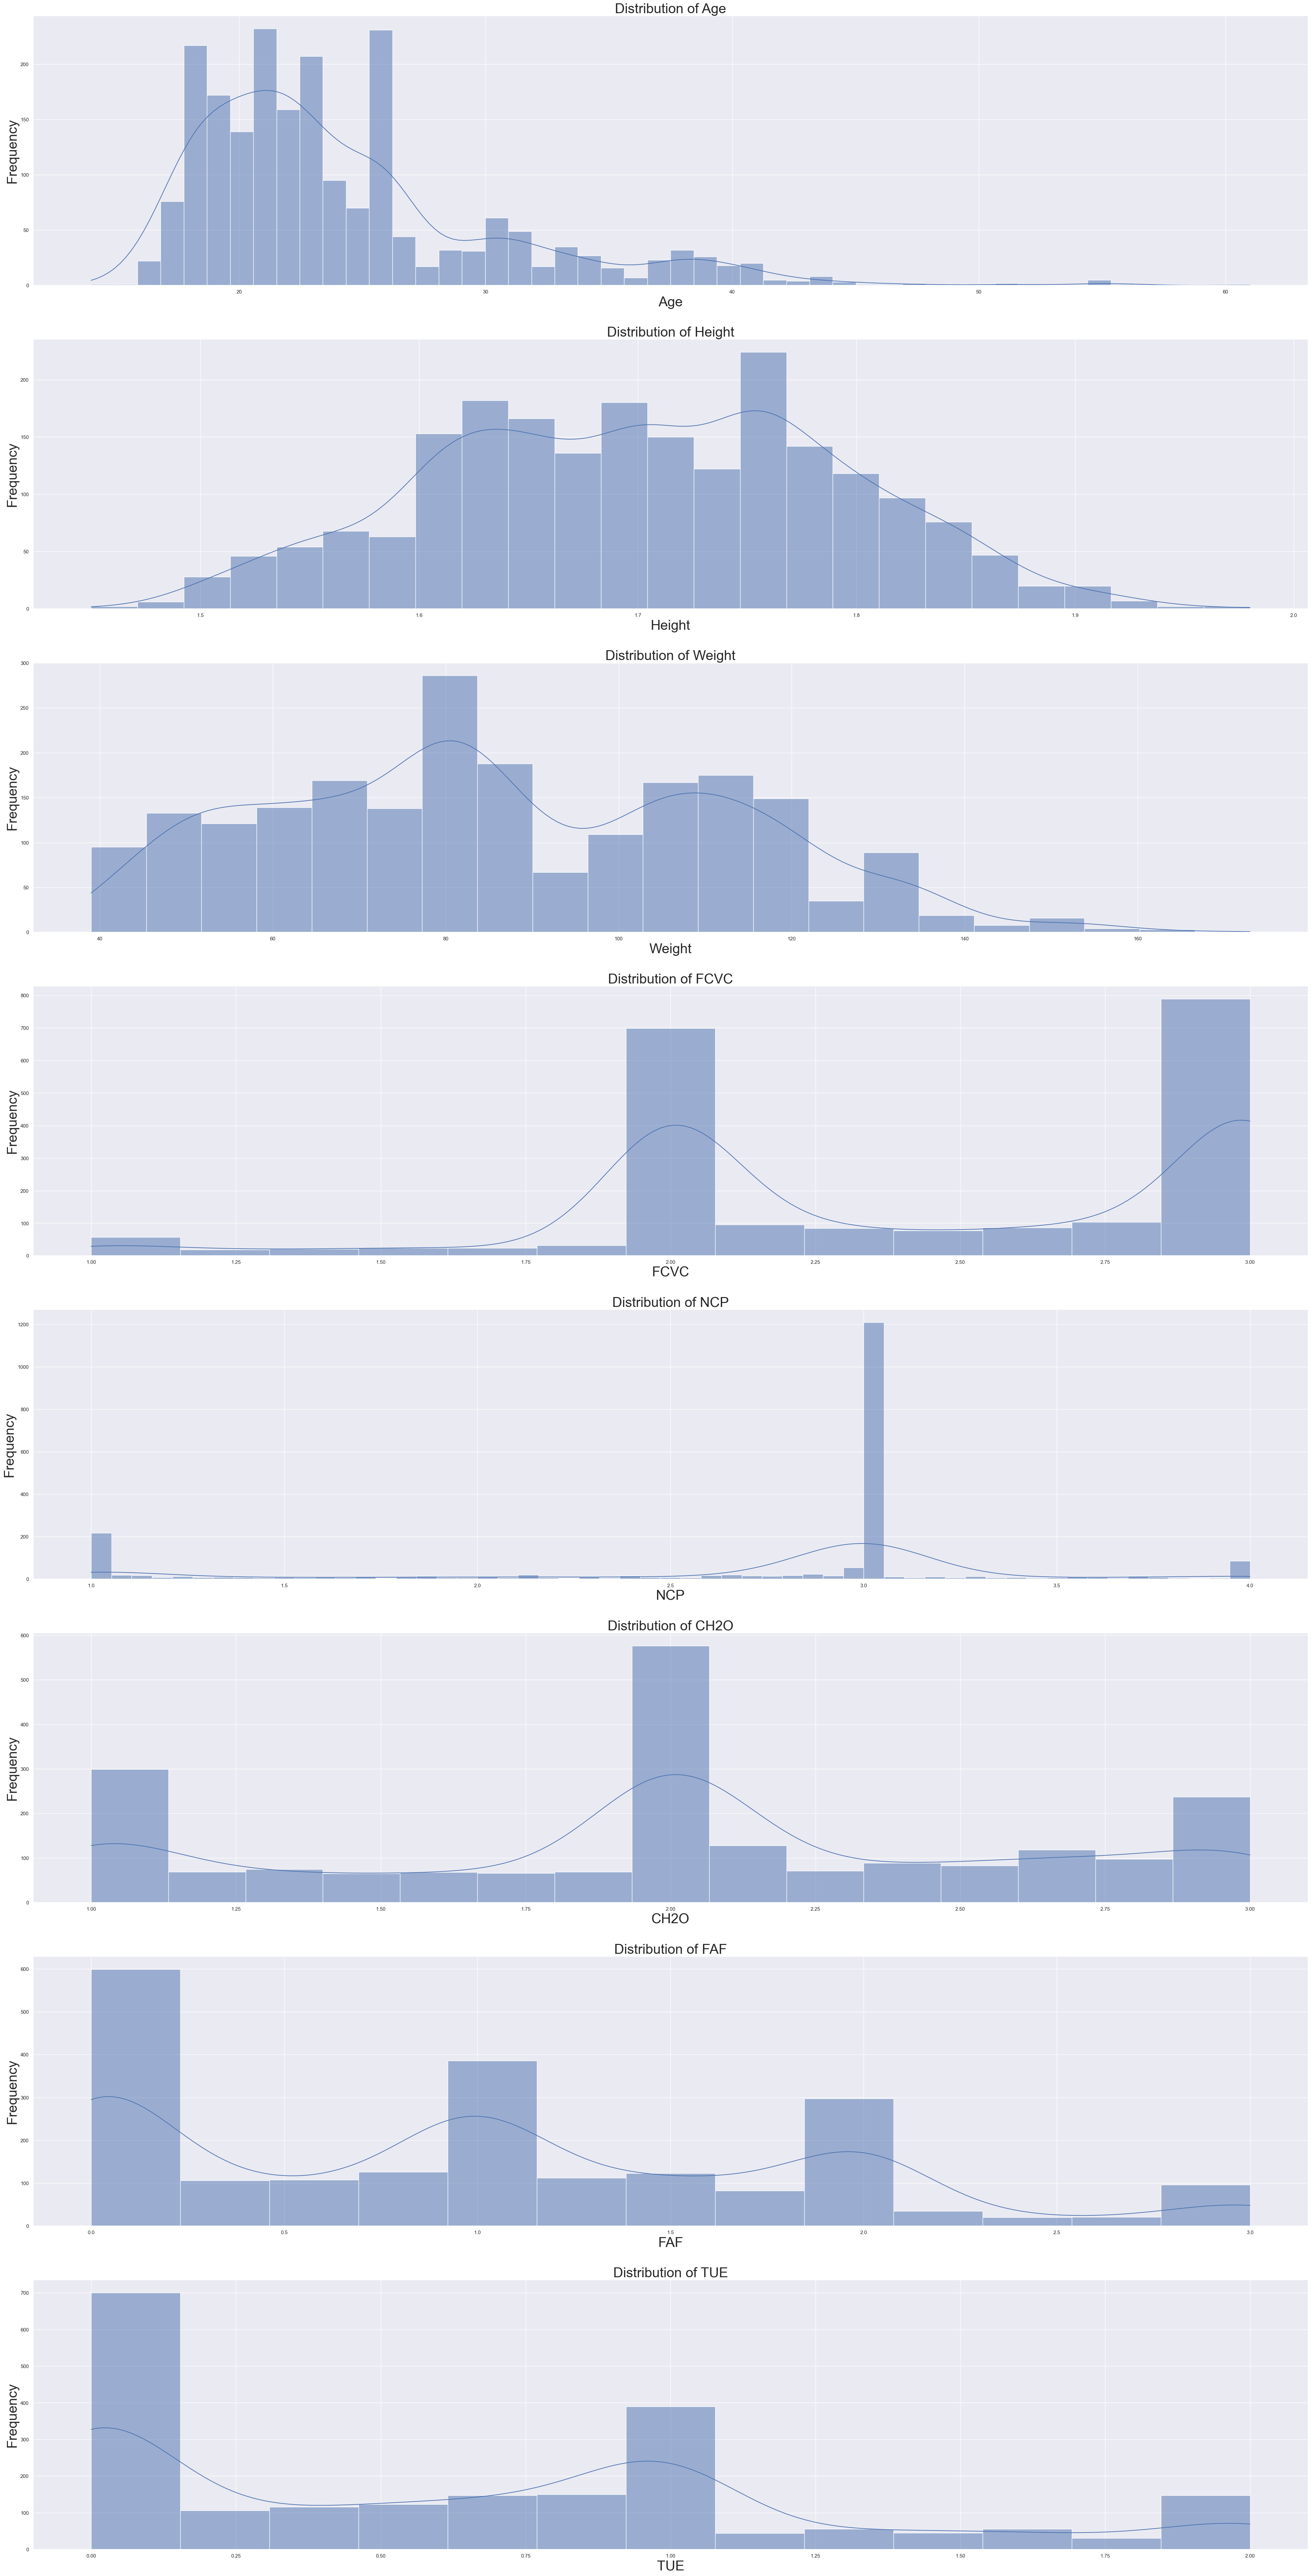

In [124]:
plt.rcParams['figure.figsize'] = (50, 100)
fontsize = 30
total_plot = len(colname_continuous)

for index, feature in enumerate(colname_continuous, 1):
    plt.subplot(total_plot, 1, index)
    sns.histplot(factor_continuous[feature], kde = True)
    plt.title(f'Distribution of {feature}', fontsize = fontsize)
    plt.xlabel(feature, fontsize = fontsize)
    plt.ylabel('Frequency', fontsize = fontsize)

plt.show()

# <font color='blue'>FAMD (Factor Analysis for Mixed Data) and Unsupervised Learning Model</font>

Since the dataset contains both categorical and continuous features, the best practice is to be cautious not to do clustering directly. One method is to apply MCA on categorical data and PCA on continuous data to reduce dimensions respectively, then combine the outputs and feed them to clustering modeling (per the advice here: https://www.kaggle.com/discussions/general/19741) . However, the problem with this approach is that it does not capture any potential interactions or dependencies between categorical and continuous variables. 

Another approach is FAMD (Factor Analysis for Mixed Data), which converts the mixed continuous and categorical data into derived continuous components. The major advantage of it is that it handles both categorical and continuous variables simultaneously, captures potential interactions between them. Here I will choose 7 components because in the original dataset, the predicted feature (obesity level) has 7 categories. FAMD will be accomplished before clustering.

In [38]:
!pip install prince

     -------------------------------------- 415.6/415.6 kB 6.4 MB/s eta 0:00:00


In [125]:
import prince
from prince import FAMD

In [126]:
predictors = df[df.columns.difference(['NObeyesdad'])]
predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   CAEC                            2111 non-null   object 
 2   CALC                            2111 non-null   object 
 3   CH2O                            2111 non-null   float64
 4   FAF                             2111 non-null   float64
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   Gender                          2111 non-null   object 
 8   Height                          2111 non-null   float64
 9   MTRANS                          2111 non-null   object 
 10  NCP                             2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  SMOKE                           21

In [127]:
# perform Factor Analysis for Mixed Data (FAMD)
famd = FAMD(n_components = 7)
famd.fit(predictors)
row_coordinates = famd.row_coordinates(predictors)
row_coordinates.head()

component,0,1,2,3,4,5,6
0,2.538694,-0.294281,-3.220894,0.652829,-1.145079,1.366100,-0.307136
1,6.209157,2.915098,2.291687,-6.660501,4.957411,3.627165,4.340271
2,1.712834,5.414929,0.817757,-3.013552,1.897985,1.106590,-1.775496
3,6.163526,9.175690,1.367959,2.229808,4.999392,1.537273,-3.635638
4,3.070385,0.459281,1.836070,1.143969,-1.247742,0.050899,0.124987


In [128]:
# then perform KMeans clustering
kmeans = KMeans(n_clusters = 7, random_state = 42)
kmeans.fit(row_coordinates)
cluster_labels = kmeans.labels_

C:\Users\gaoji\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gaoji\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


In [129]:
# evaluate clustering quality
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(row_coordinates, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.35202516180389326


Silhouette Score is a metric used to calculate the goodness of a clustering technique. With its value ranges from -1 to 1, having a score of ~0.34 means clusters are somewhat apart from each other.

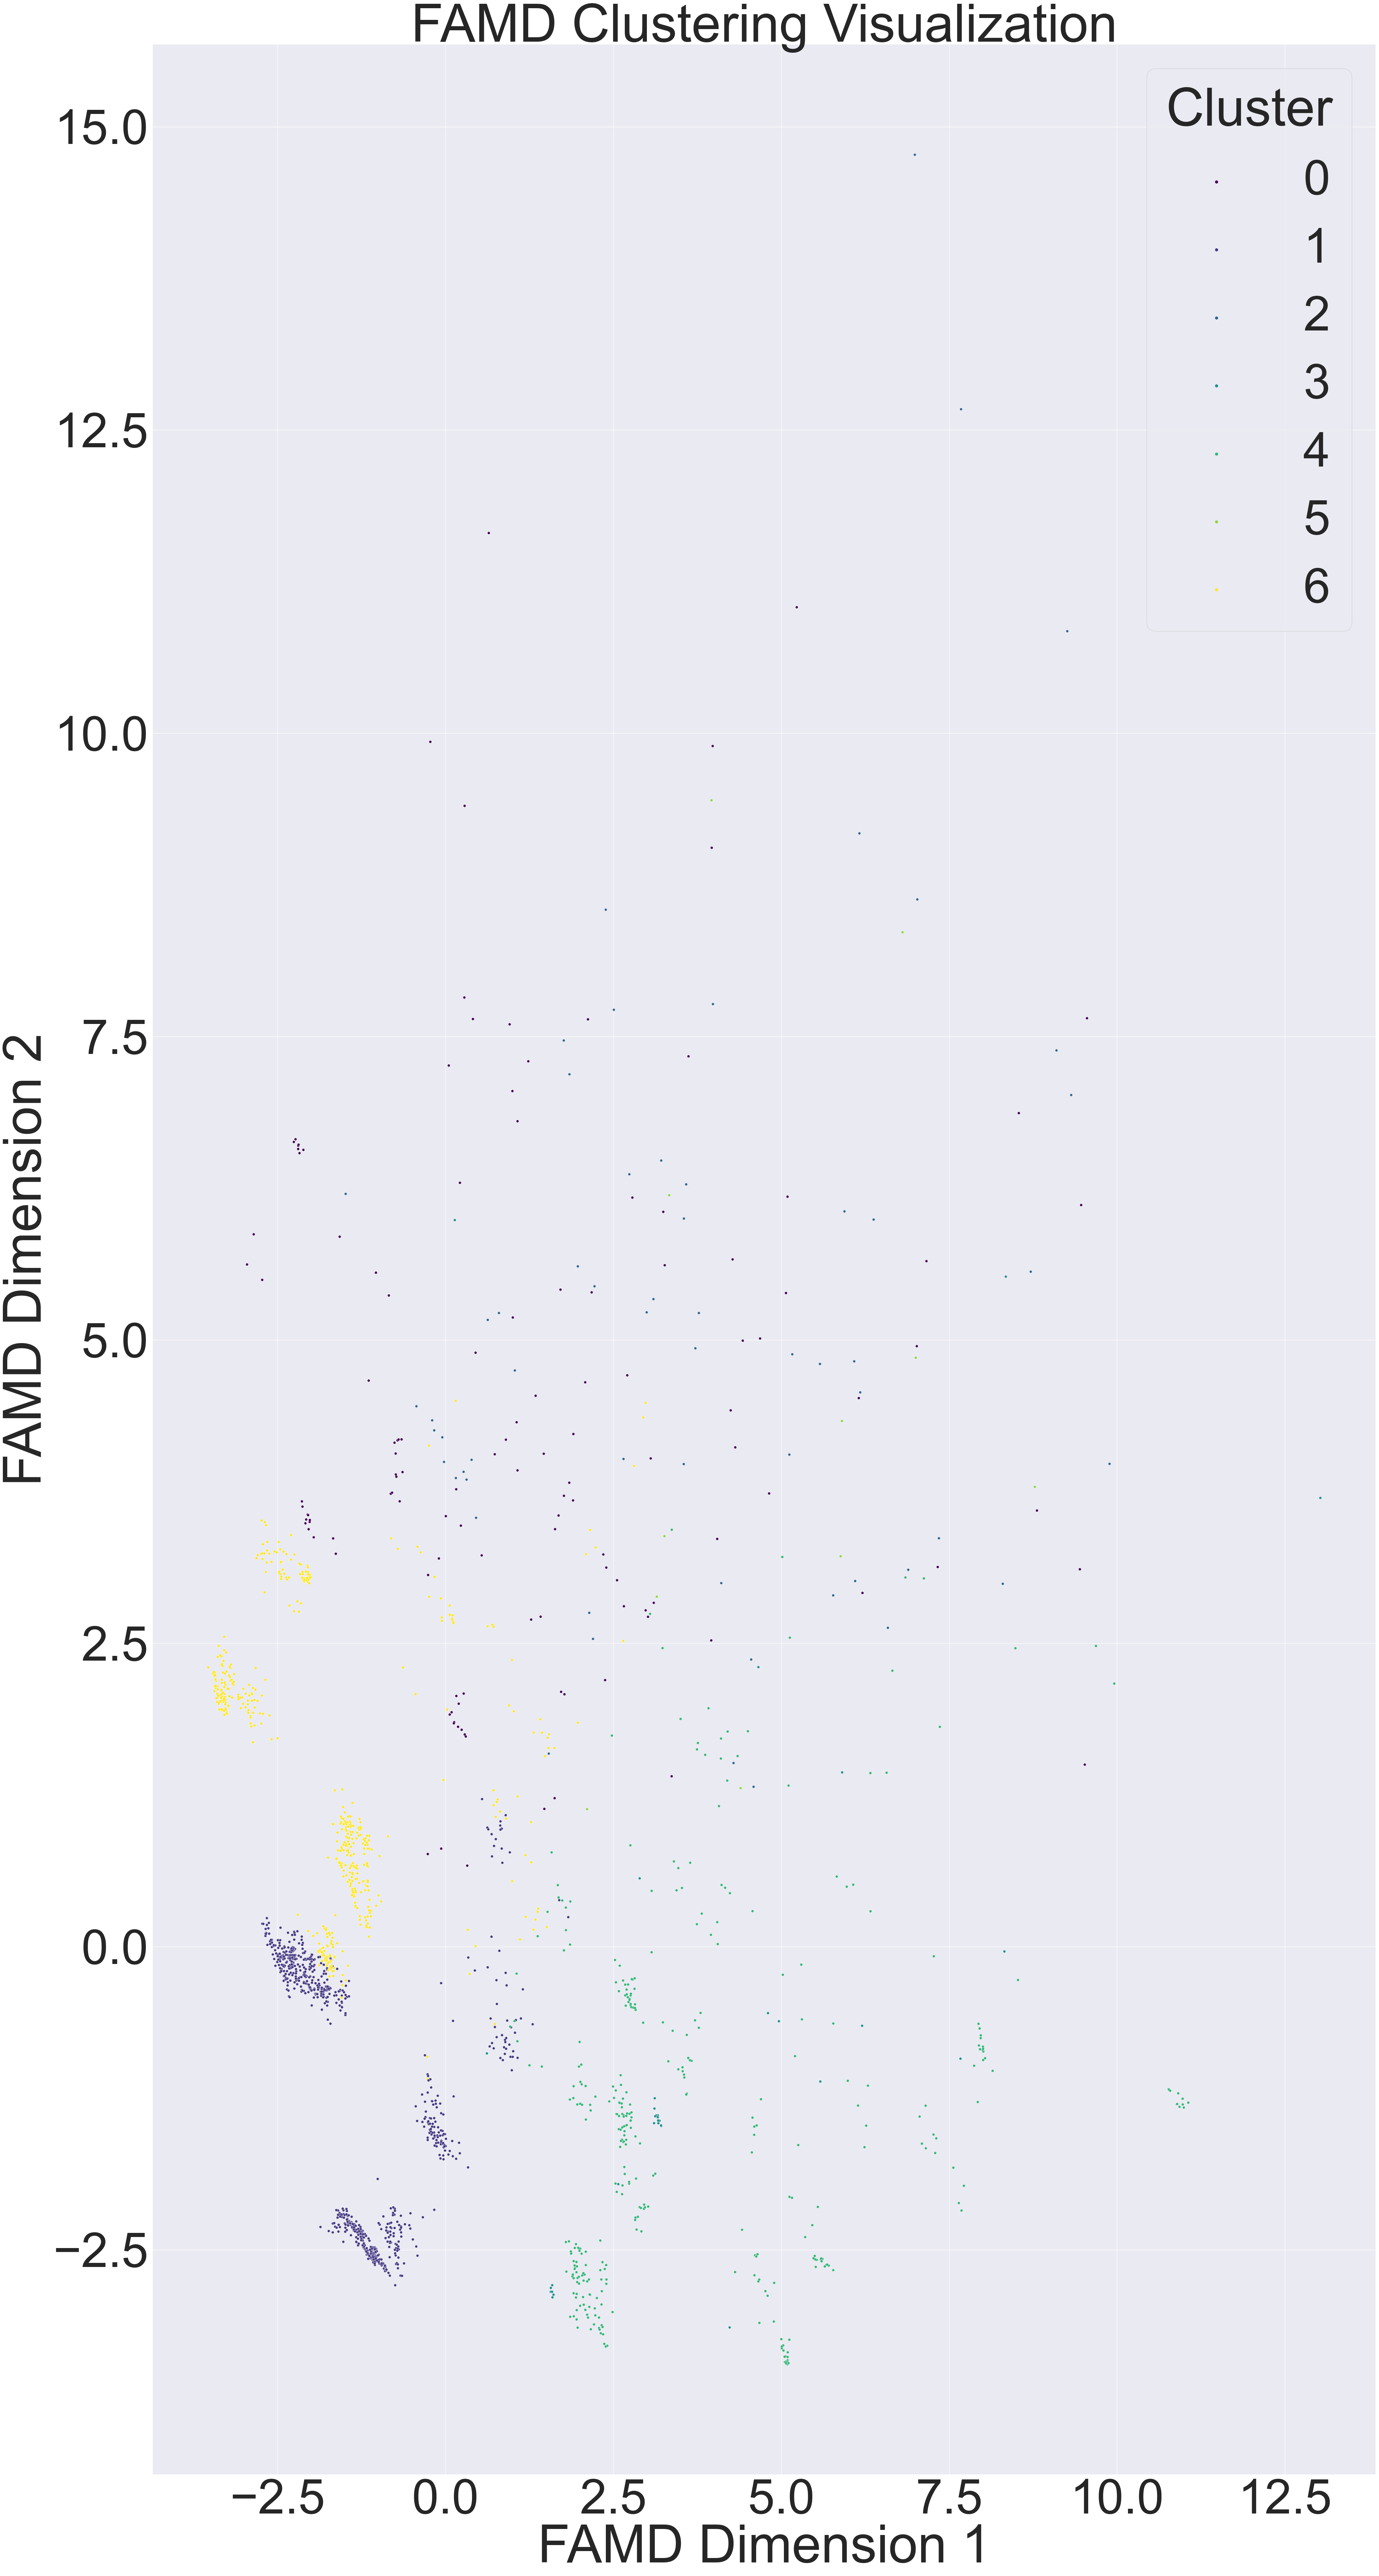

In [130]:
# visualize the clusters
sns.set(font_scale = 10)
sns.scatterplot(x=row_coordinates.iloc[:, 0], y=row_coordinates.iloc[:, 1], hue=cluster_labels, palette='viridis')
plt.xlabel('FAMD Dimension 1')
plt.ylabel('FAMD Dimension 2')
plt.title('FAMD Clustering Visualization')
plt.legend(title='Cluster')
plt.show()

In [134]:
# Interpret clusters
clustered_data = pd.concat([df, pd.DataFrame({'Cluster': cluster_labels})], axis=1)
clustered_data['Predicted_Label'] = cluster_labels
cluster_summary = clustered_data.groupby('Cluster').mean()

# Print cluster summary
print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
               Age    Height      Weight      FCVC       NCP      CH2O  \
Cluster                                                                  
0        26.073591  1.728377   82.801002  2.368795  2.666951  2.041624   
1        22.753707  1.723118  101.080516  2.499807  2.756636  2.134078   
2        21.963516  1.725463   71.350525  2.426230  2.739524  2.035666   
3        21.657311  1.642685   68.040539  2.087881  1.941481  2.639845   
4        20.877359  1.626358   55.815270  2.433278  2.623464  1.723453   
5        26.090909  1.688182   73.090909  2.363636  2.727273  2.000000   
6        29.141830  1.716211   89.233795  2.323581  2.679560  1.938831   

              FAF       TUE  Predicted_Label  
Cluster                                       
0        1.134696  0.803501              0.0  
1        0.897715  0.650318              1.0  
2        1.622951  0.885246              2.0  
3        1.164454  0.233477              3.0  
4        1.038354  0.744194      

C:\Users\gaoji\AppData\Local\Temp\ipykernel_18444\3193710792.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = clustered_data.groupby('Cluster').mean()


In [135]:
# Compared to the original label column using a help function
import itertools

def label_permute_compare(ytdf,yp):
    """
    ytdf: labels dataframe object
    yp: clustering label prediction output
    Returns permuted label order and accuracy. 
    {3:'business', 4:'entertainment', 1:'politics', 2:'sport', 0:'tech'}, 0.74
    """
    y_true = np.array(ytdf).reshape(-1)
    uniq_labels = np.unique(y_true)
    perm = itertools.permutations(range(len(uniq_labels)))
    best_p, best_acc = None, 0
    for p in perm:
        p_label_map = {label: int_label for label, int_label in zip(uniq_labels, p)}
        p_labels = np.array([p_label_map[label] for label in y_true])
        acc = np.mean(p_labels == yp)
        if acc > best_acc:
            best_p = {num: l for num, l in zip(p, uniq_labels)}
            best_acc = acc
    return best_p, best_acc

In [136]:
label_permute_compare(df['NObeyesdad'], clustered_data['Predicted_Label'])

({4: 'Insufficient_Weight',
  2: 'Normal_Weight',
  6: 'Obesity_Type_I',
  5: 'Obesity_Type_II',
  1: 'Obesity_Type_III',
  3: 'Overweight_Level_I',
  0: 'Overweight_Level_II'},
 0.3633349123638086)

The best accuracy yielded by matching the predicted labels and original labels is 0.36. 

# <font color='blue'>Compare Result to Supervised Learning Model</font>

Next I will train a supervised learning model (Random Forest) with the output variable NObeyesdad, so that I can compare it with the result from the previous unsupervised learning model. 

In [137]:
from sklearn.ensemble import RandomForestClassifier

Since we have both categorical and continuous data in the dataset, the first thing we need to do is to convert the categorical features to features can be handled by Random Forest Classifier. Here I will carefully examine each categorical feature, as some are binary, some are nominal, and others are ordinal.

In [138]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [139]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [141]:
# encode Gender (label)
df['Gender'].unique()
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [142]:
# encode CALC (ordinal)
df['CALC'].unique()
category_order = ['no', 'Sometimes', 'Frequently', 'Always']
df['CALC'] = OrdinalEncoder(categories = [category_order]).fit_transform(df['CALC'].values.reshape(-1,1))

In [143]:
# encode FAVC, SCC, SMOKE, family_history_with_overweight, MTRANS (label)
label_encoder = LabelEncoder()
df['FAVC'] = label_encoder.fit_transform(df['FAVC'])

label_encoder = LabelEncoder()
df['SCC'] = label_encoder.fit_transform(df['SCC'])

label_encoder = LabelEncoder()
df['SMOKE'] = label_encoder.fit_transform(df['SMOKE'])

label_encoder = LabelEncoder()
df['family_history_with_overweight'] = label_encoder.fit_transform(df['family_history_with_overweight'])

label_encoder = LabelEncoder()
df['MTRANS'] = label_encoder.fit_transform(df['MTRANS'])

In [144]:
# encode CAEC, NObeyesdad (ordinal)
df['CAEC'].unique()
category_order = ['no', 'Sometimes', 'Frequently', 'Always']
df['CAEC'] = OrdinalEncoder(categories = [category_order]).fit_transform(df['CAEC'].values.reshape(-1,1))

category_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Obesity_Type_II',
       'Obesity_Type_III']
df['NObeyesdad'] = OrdinalEncoder(categories = [category_order]).fit_transform(df['NObeyesdad'].values.reshape(-1,1))

In [145]:
# check data
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   int32  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   float64
 5   FAVC                            2111 non-null   int32  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   int32  
 9   SMOKE                           2111 non-null   int32  
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   int32  
 12  FAF                             21

In [146]:
X = df[df.columns.difference(['NObeyesdad', 'Predicted_Label'])]
y = df['NObeyesdad']

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# train model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [147]:
# Examine model accuracy
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9574468085106383


# <font color='blue'>Discussion and Conclusion</font>

The results from the unsupervised learning model, KMeans, yielded a relatively low accuracy of 0.35. This suggests that the clusters generated by KMeans may not fully capture the underlying structure or patterns in the data. It's important to consider the limitations of unsupervised learning, particularly in cases where the ground truth labels are not available for comparison. Despite its lower accuracy, KMeans can still provide valuable insights into the structure of the data and help identify potential groupings or trends.

On the other hand, the supervised learning model, Random Forest, achieved a significantly higher accuracy of 0.95. This indicates that the Random Forest model effectively learned to predict the target variable using the provided features. With its ability to capture complex relationships between features and the target variable, Random Forest demonstrated strong predictive performance on the dataset.

In conclusion, while both unsupervised and supervised learning approaches offer valuable insights, the supervised Random Forest model outperformed the unsupervised KMeans clustering in terms of predictive accuracy. However, it's essential to consider the objectives of the analysis and the interpretability of the results when choosing between unsupervised and supervised learning techniques. Further investigation may be needed to understand the underlying reasons for the differences in performance and to refine the modeling approach accordingly.